Operation steps
1. Install the necessary packages, requirements.txt
2. Run the following pipeline
3. Check the running result of the corresponding task in the output window or in the file./datasets/Malaysia/processed
 
If there are any problems running the code, please contact: zouting(24201617@siswa.um.edu.my)

In [1]:
import json
from datetime import datetime

from functions.monthly_boundary_SPI import run_monthly_boundary_spi
from functions.growth_season_analysis import run_growth_analysis_pipeline
from functions.syrs_yield_analysis import run_complete_syrs_analysis
from functions.spi_syrs_correlation import run_complete_spi_syrs_analysis
from functions.cmip_climate_analysis import run_cmip_climate_analysis

In [2]:
!pip install -r requirements.txt

# main pipeline
Including 5 key processing:
- run_monthly_boundary_spi
- run_growth_analysis_pipeline
- run_complete_syrs_analysis
- run_complete_spi_syrs_analysis
- run_cmip_climate_analysis

MONTHLY BOUNDARY SPI PIPELINE
Country: MALAYSIA
Run tag: run_202601131249
Output directory: /Users/luofeiyu/Desktop/wqd7003/group project/WQD-7003/datasets/malaysia/processed/run_202601131249

0. DOWNLOAD PRECIPITATION DATA FROM NOAA
In Progressing | Data source: https://downloads.psl.noaa.gov/Datasets/cpc_global_precip/
Time range: 2017 to 2022
Saving location: ./datasets/Malaysia/rawdata/history_precipitation
------------------------------------------------------------
[skip] file has existed: precip.2017.nc
[skip] file has existed: precip.2018.nc
[skip] file has existed: precip.2019.nc
[skip] file has existed: precip.2020.nc
[skip] file has existed: precip.2021.nc
[skip] file has existed: precip.2022.nc
------------------------------------------------------------
downloading completed.

1. READING DATA
----------------------------------------
Data path: /Users/luofeiyu/Desktop/wqd7003/group project/WQD-7003/datasets/malaysia/rawdata/history_precipitation
✓ Data loaded successfully
 

{'monthly_data':             time  monthly_precip      grid_id   lat     lon           region
 6912  2017-01-01      191.849762  2.25_101.75  2.25  101.75          Malacca
 6912  2017-01-01      191.849762  2.25_101.75  2.25  101.75  Negeri Sembilan
 6913  2017-02-01       90.923889  2.25_101.75  2.25  101.75          Malacca
 6913  2017-02-01       90.923889  2.25_101.75  2.25  101.75  Negeri Sembilan
 6914  2017-03-01      206.516144  2.25_101.75  2.25  101.75          Malacca
 ...          ...             ...          ...   ...     ...              ...
 18645 2022-10-01      381.687561  6.75_100.25  6.75  100.25           Perlis
 18646 2022-11-01      426.942169  6.75_100.25  6.75  100.25            Kedah
 18646 2022-11-01      426.942169  6.75_100.25  6.75  100.25           Perlis
 18647 2022-12-01      330.865082  6.75_100.25  6.75  100.25            Kedah
 18647 2022-12-01      330.865082  6.75_100.25  6.75  100.25           Perlis
 
 [6912 rows x 6 columns],
 'spi_data':        

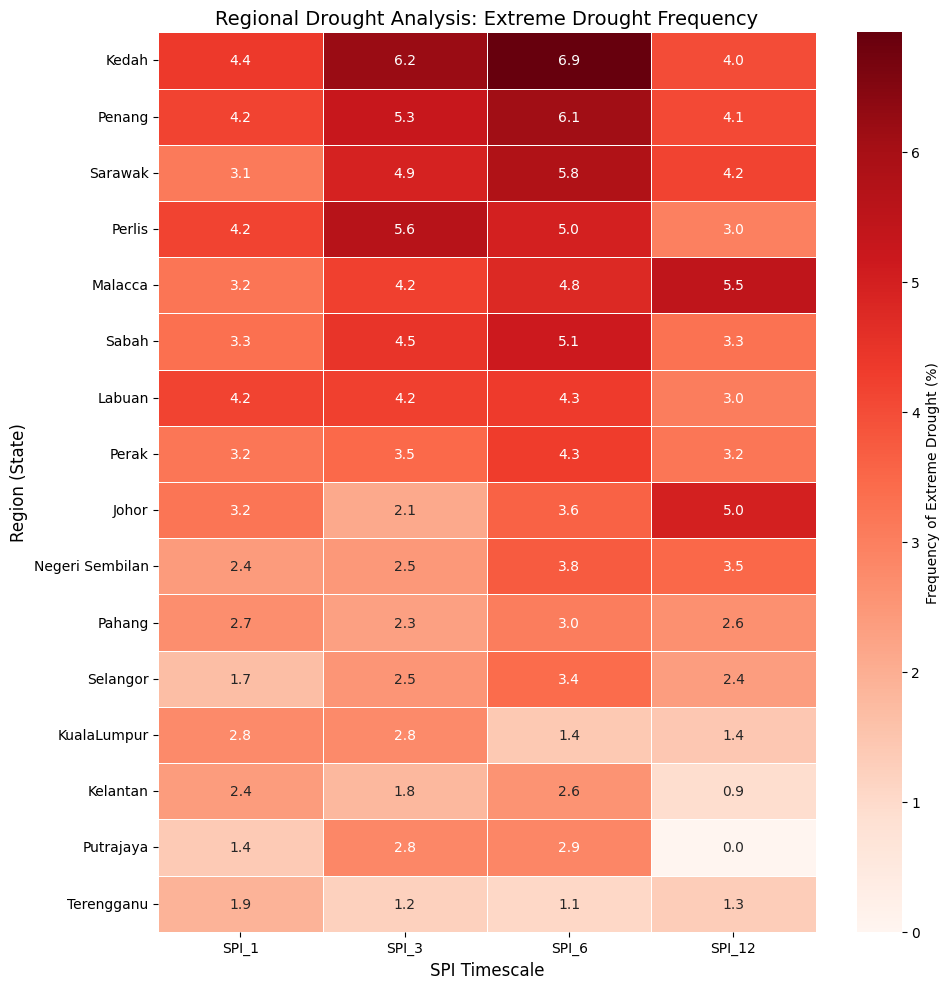

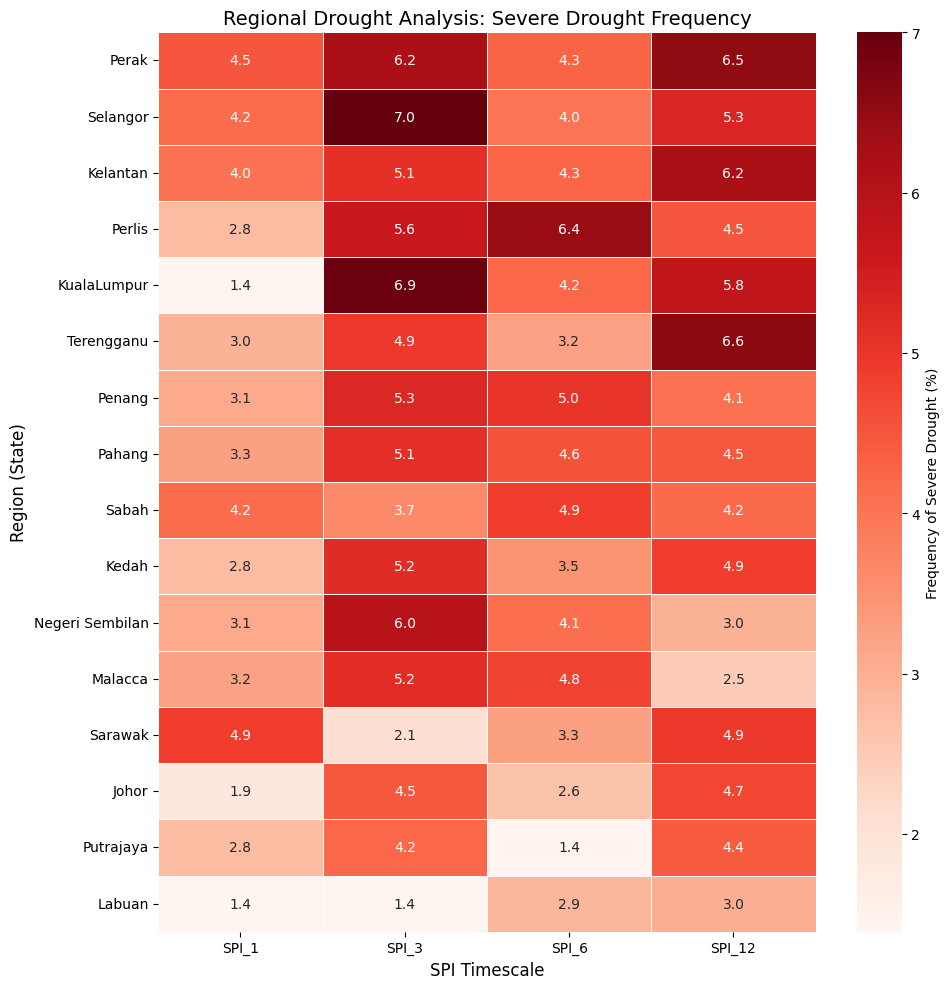

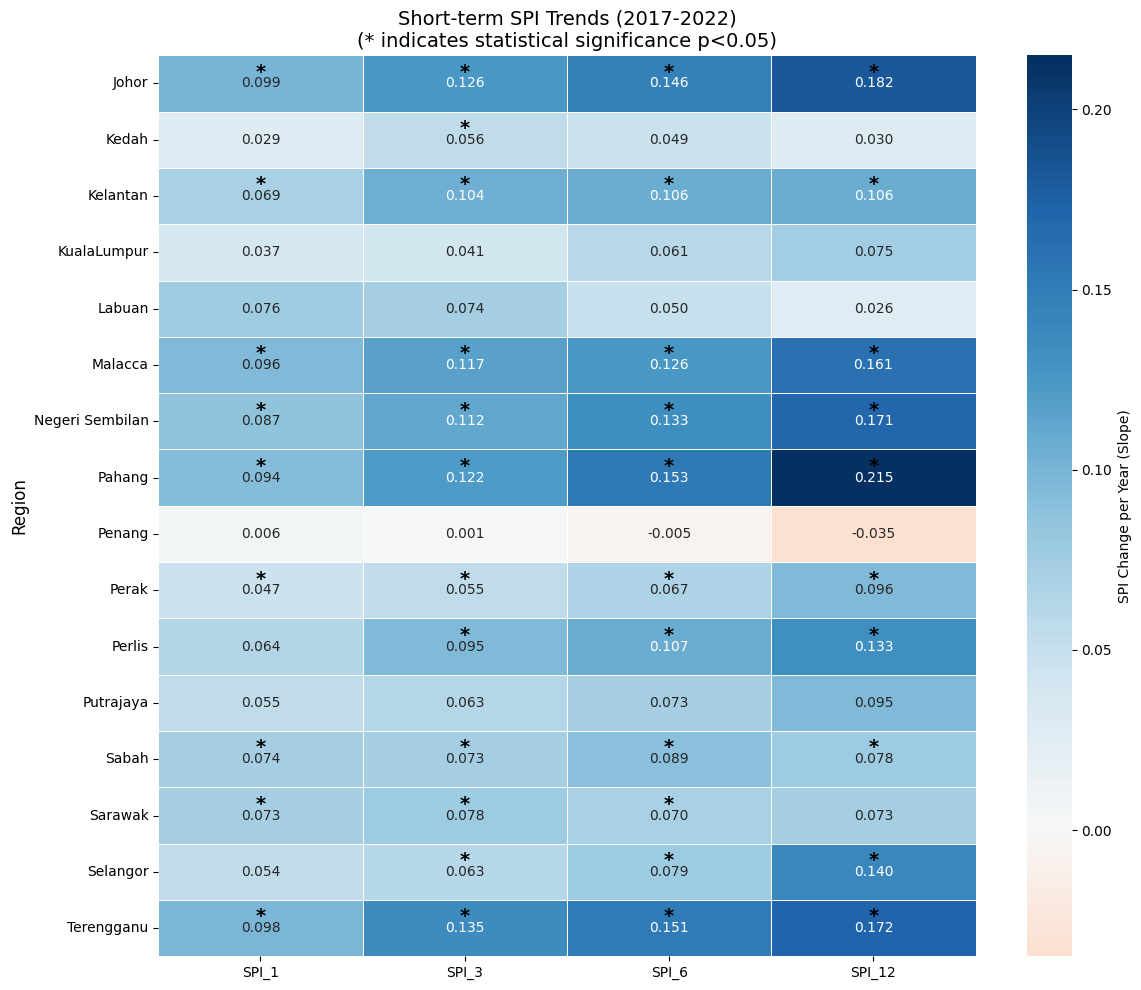

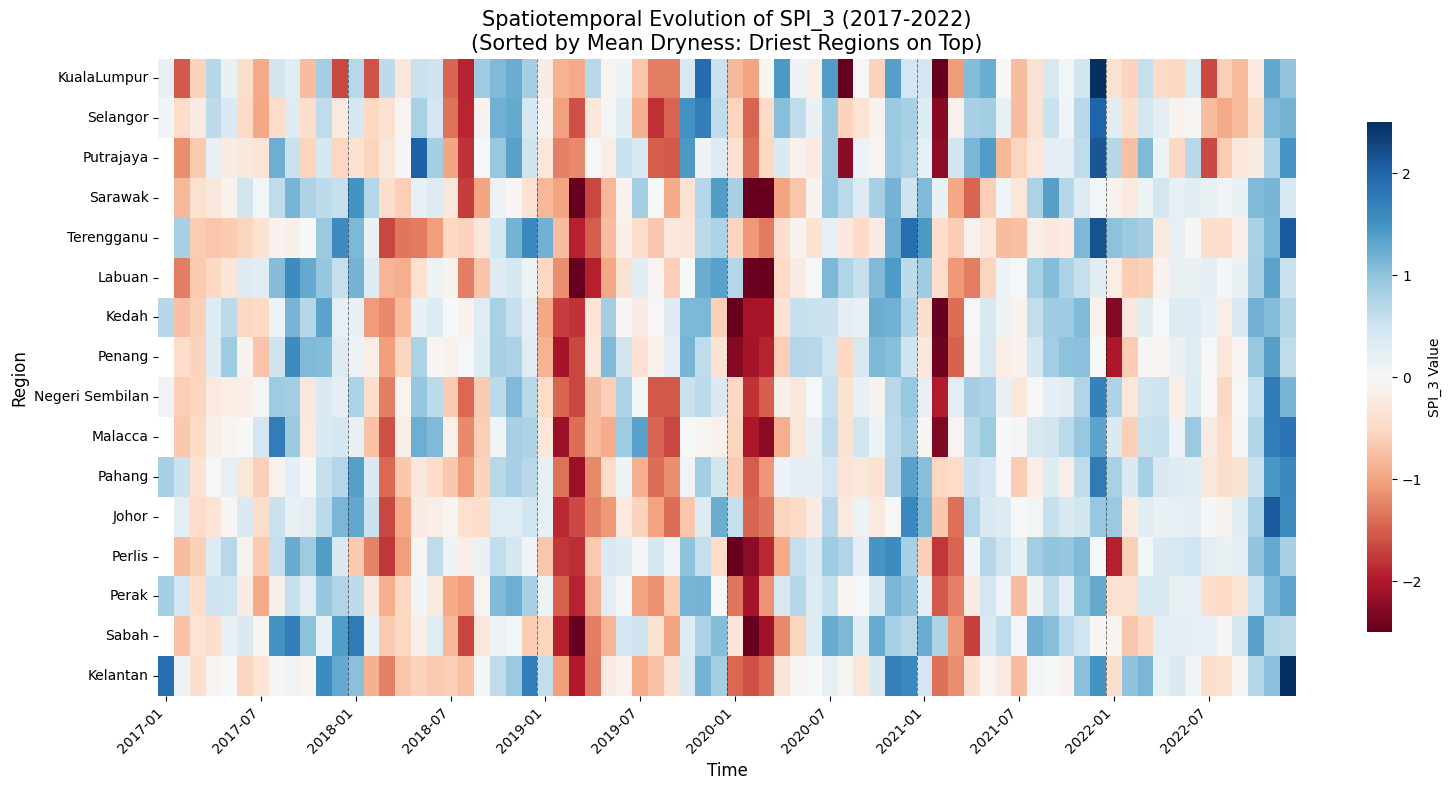

In [3]:
config = {'country': 'malaysia', 'run_tag': f"run_{datetime.now().strftime('%Y%m%d%H%M')}"}
run_monthly_boundary_spi(config)


In [4]:
run_growth_analysis_pipeline(config)


GROWTH SEASON ANALYSIS PIPELINE

Loading data...
Total clusters: 40
Number of states: 12
Total area: 233,718 ha

Clusters per state:
State
Terengganu         9
Perak              5
Selangor           4
Johor              4
Pahang             4
Negeri Sembilan    3
Malacca            3
Kedah              2
Penang             2
Kelantan           2
Perlis             1
Langkawi           1
Name: count, dtype: int64

Processing state aggregation...

Saving results...
✓ Data saved to: datasets/malaysia/processed/run_202601131249/growth_seasons/state_unified_weighted.csv
✓ state_unified_weighted.csv - Complete data
✓ Data saved to: datasets/malaysia/processed/run_202601131249/growth_seasons/state_growth_months.csv
✓ state_growth_months.csv - Growth months summary(stage T&V)
✓ Data saved to: datasets/malaysia/processed/run_202601131249/growth_seasons/state_growth_months_r.csv
✓ state_growth_months_r.csv - Growth months summary(stage R)
✓ Data saved to: datasets/malaysia/processed/run_2026011

{'result_df':     No            State Cluster_Code  Total_Area_ha  Num_Original_Clusters  \
 6    7            Kedah  Ked-Unified         104782                      2   
 10  11            Perak  Per-Unified          38643                      5   
 9   10         Kelantan  Kel-Unified          23641                      2   
 1    2           Perlis  Per-Unified          21017                      1   
 0    1         Selangor  Sel-Unified          18382                      4   
 7    8           Penang  Pen-Unified          11001                      2   
 11  12       Terengganu  Ter-Unified           9115                      9   
 5    6           Pahang  Pah-Unified           3349                      4   
 4    5            Johor  Joh-Unified           1369                      4   
 8    9          Malacca  Mal-Unified           1060                      3   
 2    3         Langkawi  Lan-Unified            913                      1   
 3    4  Negeri Sembilan  Neg-Unified  

In [5]:
run_complete_syrs_analysis(config)


Step 1: Loading Yield Data
✓ Loaded data: 96 rows
Calculating yield per hectare...
✓ After cleaning: 84 rows
✓ Removed rows: 12

State Data Statistics:
State                Years      Avg Yield (ton/ha)  
--------------------------------------------------
Johor                6          3.268               
Kedah                6          4.205               
Kelantan             6          4.087               
Melaka               6          2.973               
Negeri Sembilan      6          4.060               
Pahang               6          3.054               
Perak                6          3.380               
Perlis               6          4.209               
Pulau Pinang         6          5.284               
Sabah                6          2.799               
Sarawak              6          1.916               
Selangor             6          4.514               
Terengganu           6          3.835               

✓ Excluded national data (Malaysia)

Step 2: Calculati

{'success': True,
 'output_directory': './datasets/malaysia/processed/run_202601131249/syrs_analysis',
 'input_file': './datasets/malaysia/rawdata/crops_state.xlsx',
 'config': {'country': 'malaysia', 'run_tag': 'run_202601131249'},
 'syrs_data':          state       date crop_type  planted_area  production  year  \
 0        Johor 2017-01-01     paddy        3000.0      8563.0  2017   
 1        Johor 2018-01-01     paddy        2866.0      9424.0  2018   
 2        Johor 2019-01-01     paddy        2555.0      7704.0  2019   
 3        Johor 2020-01-01     paddy        2547.0      7502.0  2020   
 4        Johor 2021-01-01     paddy        2505.0      9031.0  2021   
 ..         ...        ...       ...           ...         ...   ...   
 73  Terengganu 2018-01-01     paddy       17431.0     74335.0  2018   
 74  Terengganu 2019-01-01     paddy       18341.0     71382.0  2019   
 75  Terengganu 2020-01-01     paddy       19071.0     73723.0  2020   
 76  Terengganu 2021-01-01     pad

In [6]:
run_complete_spi_syrs_analysis(config)


SPI-SYRS Correlation Analysis

✓ Loading growth season data: ./datasets/malaysia/processed/run_202601131249/growth_seasons/state_growth_months.csv
  Loaded 12 states

✓ Loading SPI data: ./datasets/malaysia/processed/run_202601131249/spi_results.csv
  Loaded 26892 records
  Time range: 2017 - 2022
  States: 16
  After removing missing values: 6828 records

✓ Loading SYRS data: ./datasets/malaysia/processed/run_202601131249/syrs_analysis/syrs_detailed.csv
  Loaded 78 records

Step 2: Filter SPI by Growing Season
✓ Kedah                Growth months: [1, 5, 6, 7, 10, 11, 12] | SPI records: 290
✓ Perak                Growth months: [2, 3, 4, 5, 9, 10, 11] | SPI records: 546
✓ Kelantan             Growth months: [1, 2, 3, 4, 7, 8, 9, 10, 12] | SPI records: 585
✓ Perlis               Growth months: [1, 5, 6, 7, 10, 11, 12] | SPI records: 82
✓ Selangor             Growth months: [4, 5, 6, 10, 11, 12] | SPI records: 180
✓ Penang               Growth months: [1, 5, 6, 7, 11, 12] | SPI records:

{'success': True,
 'spi_scale': 'SPI_3',
 'state_count': 9,
 'significant_states_count': 0,
 'correlation_results':              State  N  Pearson_r  Pearson_p Pearson_sig  Spearman_r  \
 1            Kedah  6   0.745028   0.089228          ns    0.485714   
 4           Pahang  6   0.386203   0.449497          ns    0.257143   
 7         Selangor  6   0.128409   0.808444          ns    0.085714   
 8       Terengganu  6   0.099560   0.851153          ns    0.485714   
 0            Johor  6   0.088121   0.868161          ns    0.085714   
 5            Perak  6   0.009518   0.985724          ns   -0.142857   
 3  Negeri Sembilan  6  -0.052229   0.921728          ns   -0.371429   
 6           Perlis  6  -0.087180   0.869562          ns   -0.028571   
 2         Kelantan  6  -0.208063   0.692409          ns    0.028571   
 
    Spearman_p Spearman_sig  SPI_mean   SPI_std     SYRS_mean  SYRS_std  
 1    0.328723           ns  0.284761  0.059092 -5.223599e-14  0.912871  
 4    0.622787 

In [7]:
run_cmip_climate_analysis(config)

CMIP6 Climate Analysis - Multi-Model Version
Found 4 sheets: ['canesm5', 'ec-earth3', 'mpi-esm1-2-hr', 'mri-esm2-0']
  Sheet 'canesm5' shape: (15, 1034)
  Sheet 'ec-earth3' shape: (15, 1034)
  Sheet 'mpi-esm1-2-hr' shape: (15, 1034)
  Sheet 'mri-esm2-0' shape: (15, 1034)
  Processing model: canesm5
  Processing model: ec-earth3
  Processing model: mpi-esm1-2-hr
  Processing model: mri-esm2-0
Combined total records: 61920
Individual model SPI saved: ./datasets/malaysia/processed/run_202601131249/cmip_analysis/spi_individual_models.csv
Ensemble statistics saved: 15480 records
=====NO STATE====Kuala Lumpur
=====NO STATE====Labuan
=====NO STATE====Sabah
=====NO STATE====Sarawak
Annual SPI saved: 946 records
  Johor: no trend, p=0.1054, slope=0.002602
  Kedah: increasing, p=0.0172, slope=0.002540
  Kelantan: no trend, p=0.5936, slope=0.000584
  Malacca: increasing, p=0.0303, slope=0.003239
  Negeri Sembilan: no trend, p=0.7434, slope=0.000582
  Pahang: no trend, p=0.0615, slope=0.002363
  P

{'success': True,
 'output_directory': './datasets/malaysia/processed/run_202601131249/cmip_analysis',
 'excel_path': './datasets/malaysia/rawdata/cmip6-4models.xlsx',
 'config': {'country': 'malaysia', 'run_tag': 'run_202601131249'},
 'combined_data':               code        name       date  precip       model
 0      MYS.1531891       Johor 2015-01-01   93.72     canesm5
 1      MYS.1531891       Johor 2015-02-01   58.70     canesm5
 2      MYS.1531891       Johor 2015-03-01  213.06     canesm5
 3      MYS.1531891       Johor 2015-04-01  164.28     canesm5
 4      MYS.1531891       Johor 2015-05-01  215.63     canesm5
 ...            ...         ...        ...     ...         ...
 61915  MYS.1531904  Terengganu 2100-08-01  269.03  mri-esm2-0
 61916  MYS.1531904  Terengganu 2100-09-01  314.06  mri-esm2-0
 61917  MYS.1531904  Terengganu 2100-10-01  369.42  mri-esm2-0
 61918  MYS.1531904  Terengganu 2100-11-01  313.20  mri-esm2-0
 61919  MYS.1531904  Terengganu 2100-12-01  325.21  mri